In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#Loading Datasets using pandas
match_data = pd.read_csv('Datasets/matches_2008-2024.csv')
delivery_data = pd.read_csv('Datasets/deliveries_2008-2024.csv')

In [2]:
#printing the first 5 rows of the datasets
print(match_data.head())
print("\n")
#printing the first 5 rows of the datasets
print(delivery_data.head())

       id  season        city       date match_type player_of_match  \
0  335982    2008   Bangalore  4/18/2008     League     BB McCullum   
1  335983    2008  Chandigarh  4/19/2008     League      MEK Hussey   
2  335984    2008       Delhi  4/19/2008     League     MF Maharoof   
3  335985    2008      Mumbai  4/20/2008     League      MV Boucher   
4  335986    2008     Kolkata  4/20/2008     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner toss_decision  \
0        Kolkata Knight Rid

In [3]:
# Get null values in match_data
null_values_match_data = match_data.isnull().sum()
print("Null values in match_data:\n", null_values_match_data)

# Get null values in delivery_data
null_values_delivery_data = delivery_data.isnull().sum()
print("\nNull values in delivery_data:\n", null_values_delivery_data)

Null values in match_data:
 id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

Null values in delivery_data:
 match_id                             0
inning                               0
batting_team                         0
bowling_team                         0
over                                 0
ball                                 0
batter                               0
bowler                               0
non_striker                          0
batsman_runs                         0
extra_runs                           0
total_runs        

In [4]:
# Get the shape of match_data
match_data_shape = match_data.shape
print("Shape of match_data (rows, columns):", match_data_shape)

# Get the shape of delivery_data
delivery_data_shape = delivery_data.shape
print("Shape of delivery_data (rows, columns):", delivery_data_shape)

# Show columns of match_data
print("Columns in match_data:\n", match_data.columns)

# Show columns of delivery_data
print("\nColumns in delivery_data:\n", delivery_data.columns)

# Show rows of match_data
print("\nRows in match_data:\n", match_data)

# Show rows of delivery_data
print("\nRows in delivery_data:\n", delivery_data)

Shape of match_data (rows, columns): (1095, 20)
Shape of delivery_data (rows, columns): (260920, 17)
Columns in match_data:
 Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

Columns in delivery_data:
 Index(['match_id', 'inning ', 'batting_team                ',
       'bowling_team                ', 'over ', 'ball ',
       'batter                  ', 'bowler                  ',
       'non_striker             ', 'batsman_runs ', 'extra_runs ',
       'total_runs ', 'extras_type ', 'is_wicket ', 'player_dismissed        ',
       'dismissal_kind        ', 'fielder'],
      dtype='object')

Rows in match_data:
            id  season        city       date   match_type  player_of_match  \
0      335982    2008   Bangalore  4/18/2008       League     

In [5]:
# Print the number of matches played so far
matches_played = match_data.shape[0]
print("Matches played so far:", matches_played)

print("\n")

# Print the unique cities in which matches have been played
unique_cities = match_data['city'].dropna().unique() # dropna() is used to remove the NaN values
print("Cities in which matches have been played (unique):", unique_cities)

print("\n")
# Print the unique teams that have participated so far
unique_teams = pd.concat([match_data['team1'], match_data['team2']]).unique()
print("Teams that have participated so far (unique):", unique_teams)

print("\n")
# Print the number of seasons in the dataset
num_seasons = match_data['season'].nunique() # nunique() returns the number of unique values
print("Number of seasons in the dataset:", num_seasons)

Matches played so far: 1095


Cities in which matches have been played (unique): ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah' 'Navi Mumbai'
 'Lucknow' 'Guwahati' 'Mohali']


Teams that have participated so far (unique): ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals'
 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans'
 'Royal Challengers Bengaluru']


Number of seasons in the dataset: 17


In [6]:

# Print the season with number of matches in a tabular format
matches_per_season_df = match_data.groupby('season').size().reset_index(name='Matches') # Group by season and count the number of matches in each season using size() and reset_index() to get a DataFrame with 'season' and 'Matches' columns
print(matches_per_season_df.to_string(index=False))

 season  Matches
   2008       58
   2009       57
   2010       60
   2011       73
   2012       74
   2013       76
   2014       60
   2015       59
   2016       60
   2017       59
   2018       60
   2019       60
   2020       60
   2021       60
   2022       74
   2023       74
   2024       71


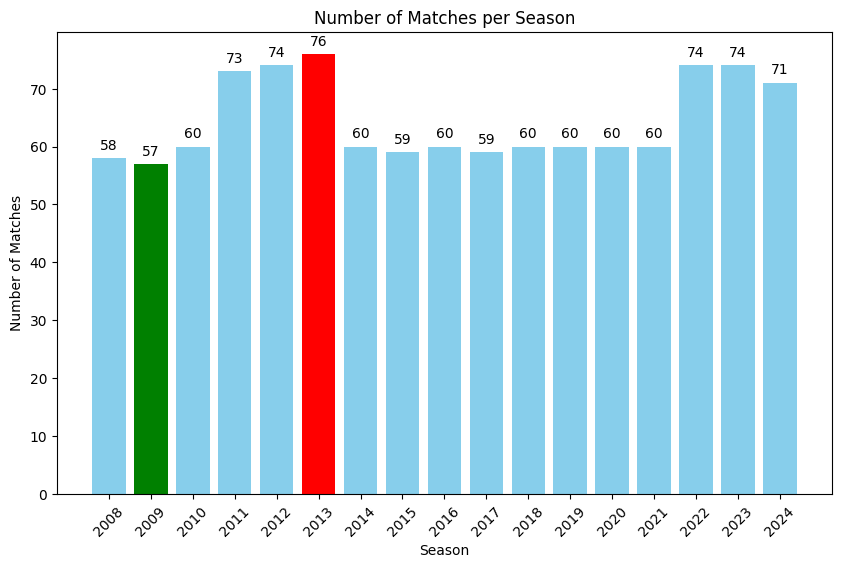

In [7]:
# Create a bar graph for the number of matches per season
plt.figure(figsize=(10, 6))  # Set the figure size

# Define colors for the bars: red for the max value, green for the min value, and skyblue for others
colors = ['red' if x == matches_per_season_df['Matches'].max() else 'green' if x == matches_per_season_df['Matches'].min() else 'skyblue' for x in matches_per_season_df['Matches']]

# Create the bar plot
bars = plt.bar(matches_per_season_df['season'], matches_per_season_df['Matches'], color=colors)

# Set the x-axis label
plt.xlabel('Season')

# Set the y-axis label
plt.ylabel('Number of Matches')

# Set the title of the plot
plt.title('Number of Matches per Season')

# Rotate the x-axis labels for better readability
plt.xticks(matches_per_season_df['season'], rotation=45)

# Annotate bars with the number of matches
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')  # Add text annotation

# Display the plot
plt.show()

In [8]:
# Strip trailing spaces from column names in delivery_data
delivery_data.columns = delivery_data.columns.str.strip()

# Ensure column names are unique
delivery_data = delivery_data.loc[:, ~delivery_data.columns.duplicated()]

# Verify the column names
print(delivery_data.columns)

# Merge delivery_data with match_data to get the season column
delivery_data = delivery_data.merge(match_data[['id', 'season']], left_on='match_id', right_on='id', how='left')

# Drop the redundant 'id' column from the merged dataframe
delivery_data.drop(columns=['id'], inplace=True)

# Reorder columns to bring 'season' to the front
cols = ['season'] + [col for col in delivery_data.columns if col != 'season']
delivery_data = delivery_data[cols]

# Display the first few rows of the updated delivery_data to verify the new column
print(delivery_data.head())

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')
   season  match_id  inning                  batting_team  \
0    2008    335982       1  Kolkata Knight Riders          
1    2008    335982       1  Kolkata Knight Riders          
2    2008    335982       1  Kolkata Knight Riders          
3    2008    335982       1  Kolkata Knight Riders          
4    2008    335982       1  Kolkata Knight Riders          

                   bowling_team  over  ball                    batter  \
0  Royal Challengers Bangalore      0     1  SC Ganguly                 
1  Royal Challengers Bangalore      0     2  BB McCullum                
2  Royal Challengers Bangalore      0     3  BB McCullum                
3  Royal Challengers Bangalore      0     4  BB McCullum        

In [9]:
# Calculate total runs per season
total_runs_per_season = delivery_data.groupby('season')['total_runs'].sum().reset_index()

# Create a line plot using Plotly
fig = go.Figure()

# Add a trace for the total runs per season
fig.add_trace(go.Scatter(
    x=total_runs_per_season['season'],
    y=total_runs_per_season['total_runs'],
    mode='lines+markers',
    name='Total Runs',
    line=dict(color='blue'),
    marker=dict(size=8)
))

# Update layout
fig.update_layout(
    title='Total Runs per Season',
    xaxis_title='Season',
    yaxis_title='Total Runs',
    hovermode='x unified'
)

# Show the plot
fig.show()

In [10]:
# Calculate runs scored per match for each season
runs_per_match_per_season = total_runs_per_season.copy()
runs_per_match_per_season['matches'] = matches_per_season_df['Matches']
runs_per_match_per_season['runs_per_match'] = runs_per_match_per_season['total_runs'] / runs_per_match_per_season['matches']

# Display the result
print(runs_per_match_per_season)

    season  total_runs  matches  runs_per_match
0     2008       17937       58      309.258621
1     2009       16353       57      286.894737
2     2010       18883       60      314.716667
3     2011       21154       73      289.780822
4     2012       22453       74      303.418919
5     2013       22602       76      297.394737
6     2014       18931       60      315.516667
7     2015       18353       59      311.067797
8     2016       18862       60      314.366667
9     2017       18786       59      318.406780
10    2018       19901       60      331.683333
11    2019       19434       60      323.900000
12    2020       19416       60      323.600000
13    2021       18637       60      310.616667
14    2022       24395       74      329.662162
15    2023       25688       74      347.135135
16    2024       25971       71      365.788732


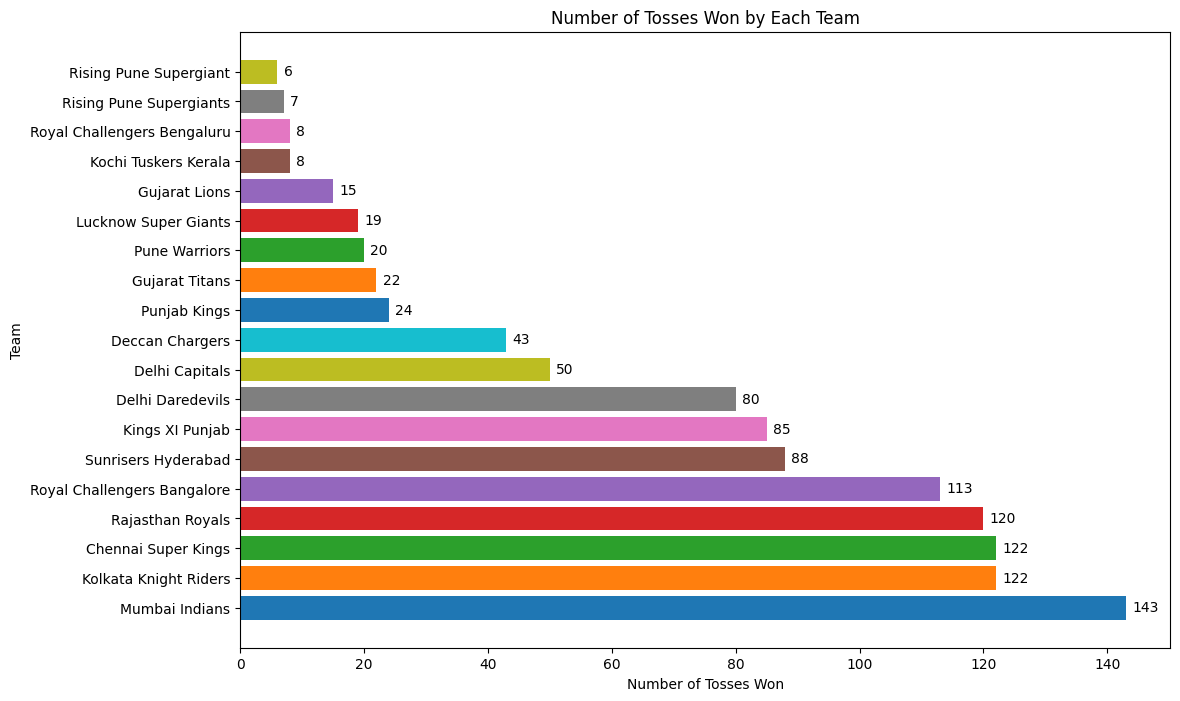

In [11]:
# Calculate the number of tosses won by each team
tosses_won_by_team = match_data['toss_winner'].value_counts().reset_index()
tosses_won_by_team.columns = ['Team', 'Tosses Won']

# Create a horizontal bar plot using matplotlib
plt.figure(figsize=(12, 8))  # Set the figure size

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create the horizontal bar plot
bars = plt.barh(tosses_won_by_team['Team'], tosses_won_by_team['Tosses Won'], color=colors)

# Set the y-axis label
plt.ylabel('Team')

# Set the x-axis label
plt.xlabel('Number of Tosses Won')

# Set the title of the plot
plt.title('Number of Tosses Won by Each Team')

# Annotate bars with the number of tosses won
for bar in bars:
    xval = bar.get_width()  # Get the width of the bar
    plt.text(xval + 1, bar.get_y() + bar.get_height()/2, int(xval), ha='left', va='center')  # Add text annotation

# Display the plot
plt.show()


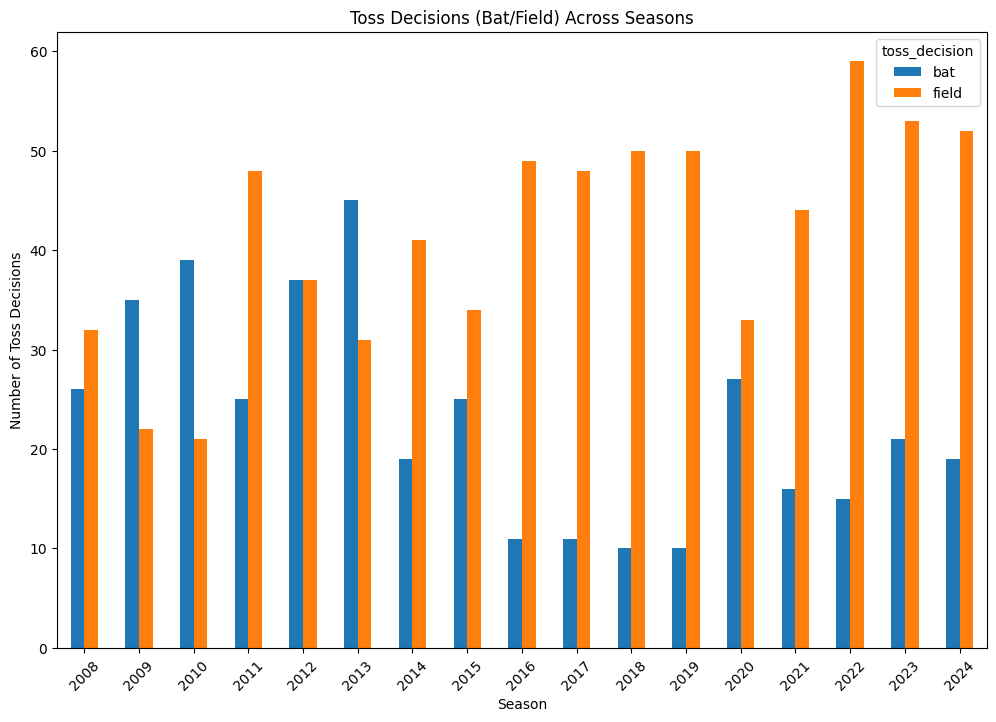

In [12]:
# Count the number of toss decisions (bat/field) for each season
toss_decision_per_season = match_data.groupby(['season', 'toss_decision']).size().unstack().fillna(0)

# Plot the data
toss_decision_per_season.plot(kind='bar', stacked=False, figsize=(12, 8), color=['#1f77b4', '#ff7f0e'])

# Set the x-axis label
plt.xlabel('Season')

# Set the y-axis label
plt.ylabel('Number of Toss Decisions')

# Set the title of the plot
plt.title('Toss Decisions (Bat/Field) Across Seasons')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



In [13]:
# Calculate total wickets per season
total_wickets_per_season = delivery_data[delivery_data['is_wicket'] == 1].groupby('season').size().reset_index(name='total_wickets')

# Calculate total runs per season (already calculated as total_runs_per_season)
# total_runs_per_season is already defined in previous cells

# Calculate total ties per season
total_ties_per_season = match_data[match_data['result'] == 'tie'].groupby('season').size().reset_index(name='total_ties')

# Merge the dataframes to get a consolidated view
season_stats = total_runs_per_season.merge(total_wickets_per_season, on='season', how='left').merge(total_ties_per_season, on='season', how='left')

# Fill NaN values with 0 (for seasons with no ties)
season_stats['total_ties'] = season_stats['total_ties'].fillna(0).astype(int)

# Display the result
print(season_stats)
# Calculate total runs, wickets, and ties across all seasons
total_runs = season_stats['total_runs'].sum()
total_wickets = season_stats['total_wickets'].sum()
total_ties = season_stats['total_ties'].sum()

# Display the total results
print(f"Total Runs: {total_runs}")
print(f"Total Wickets: {total_wickets}")
print(f"Total Ties: {total_ties}")

    season  total_runs  total_wickets  total_ties
0     2008       17937            690           0
1     2009       16353            698           1
2     2010       18883            725           1
3     2011       21154            813           0
4     2012       22453            858           0
5     2013       22602            912           2
6     2014       18931            674           1
7     2015       18353            691           1
8     2016       18862            666           0
9     2017       18786            711           1
10    2018       19901            722           0
11    2019       19434            685           2
12    2020       19416            677           4
13    2021       18637            717           1
14    2022       24395            912           0
15    2023       25688            916           0
16    2024       25971            883           0
Total Runs: 347756
Total Wickets: 12950
Total Ties: 14


In [14]:
# Filter matches won by wickets
matches_won_by_wickets = match_data[match_data['result'] == 'wickets']

# Group by venue and count the number of matches won by wickets
stadium_wins_by_wickets = matches_won_by_wickets['venue'].value_counts().reset_index()
stadium_wins_by_wickets.columns = ['Stadium', 'Wins by Wickets']

# Display the stadium with the highest number of wins by wickets
best_stadium_for_wickets = stadium_wins_by_wickets.iloc[0]
print(f"Stadium with the highest number of wins by wickets: {best_stadium_for_wickets['Stadium']} with {best_stadium_for_wickets['Wins by Wickets']} wins")

# Merge delivery_data with match_data to get the venue column
delivery_data_with_venue = delivery_data.merge(match_data[['id', 'venue']], left_on='match_id', right_on='id', how='left')

# Calculate the total runs scored at each stadium
stadium_total_runs = delivery_data_with_venue.groupby('venue')['total_runs'].sum().reset_index()
stadium_total_runs.columns = ['Stadium', 'Total Runs']

# Merge the stadium wins by wickets with total runs
stadium_stats = stadium_wins_by_wickets.merge(stadium_total_runs, on='Stadium', how='left')

# Calculate the toss winner team with the maximum possibility of winning at each stadium
stadium_toss_wins = match_data.groupby(['venue', 'toss_winner']).size().reset_index(name='Toss Wins')
stadium_wins = match_data.groupby(['venue', 'winner']).size().reset_index(name='Wins')
stadium_toss_wins = stadium_toss_wins.merge(stadium_wins, left_on=['venue', 'toss_winner'], right_on=['venue', 'winner'], how='left')
stadium_toss_wins['Win Probability'] = stadium_toss_wins['Wins'] / stadium_toss_wins['Toss Wins']
stadium_toss_wins = stadium_toss_wins.sort_values(by='Win Probability', ascending=False).drop_duplicates(subset=['venue'])

# Merge the toss win probability with stadium stats
stadium_stats = stadium_stats.merge(stadium_toss_wins[['venue', 'toss_winner', 'Win Probability']], left_on='Stadium', right_on='venue', how='left').drop(columns=['venue'])

# Display the result
print(stadium_stats)

Stadium with the highest number of wins by wickets: Eden Gardens with 45 wins
                                              Stadium  Wins by Wickets  \
0                                        Eden Gardens               45   
1                                    Wankhede Stadium               37   
2                               M Chinnaswamy Stadium               36   
3                              Sawai Mansingh Stadium               32   
4                                    Feroz Shah Kotla               31   
5           Rajiv Gandhi International Stadium, Uppal               28   
6                            Wankhede Stadium, Mumbai               27   
7                 Dubai International Cricket Stadium               22   
8          Punjab Cricket Association Stadium, Mohali               20   
9                             Sharjah Cricket Stadium               18   
10                    MA Chidambaram Stadium, Chepauk               17   
11                               S

In [15]:
# Group by venue and winner to count the number of wins for each team at each venue
venue_wins = match_data.groupby(['venue', 'winner']).size().reset_index(name='Wins')

# Find the team with the maximum wins at each venue
max_wins_per_venue = venue_wins.loc[venue_wins.groupby('venue')['Wins'].idxmax()]

# Display the result in a tabular format
print(max_wins_per_venue[['winner', 'venue']])

                          winner  \
1                 Delhi Capitals   
8                 Delhi Capitals   
14               Deccan Chargers   
17                  Punjab Kings   
22          Lucknow Super Giants   
27                Mumbai Indians   
31                Delhi Capitals   
38           Chennai Super Kings   
41           Chennai Super Kings   
48                Mumbai Indians   
52           Chennai Super Kings   
69           Sunrisers Hyderabad   
70                Delhi Capitals   
72           Chennai Super Kings   
88         Kolkata Knight Riders   
96         Kolkata Knight Riders   
104             Delhi Daredevils   
116                Gujarat Lions   
121              Kings XI Punjab   
122          Chennai Super Kings   
126              Kings XI Punjab   
131          Chennai Super Kings   
138             Delhi Daredevils   
152  Royal Challengers Bangalore   
159  Royal Challengers Bengaluru   
166  Royal Challengers Bangalore   
167          Chennai Super K

In [16]:
from dash import dcc, html, dash_table
import dash
from dash.dependencies import Input, Output

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("IPL Data Analysis Dashboard"),
    
    # Dropdown for selecting the season
    dcc.Dropdown(
        id='season-dropdown',
        options=[{'label': season, 'value': season} for season in match_data['season'].unique()],
        value=match_data['season'].unique()[0],
        clearable=False
    ),
    
    # Graph for total runs per season
    dcc.Graph(id='total-runs-graph'),
    
    # Data table for match data
    dash_table.DataTable(
        id='match-data-table',
        columns=[{"name": i, "id": i} for i in match_data.columns],
        data=match_data.to_dict('records'),
        page_size=10
    )
])

# Define the callback to update the graph based on selected season
@app.callback(
    Output('total-runs-graph', 'figure'),
    [Input('season-dropdown', 'value')]
)
def update_graph(selected_season):
    filtered_data = total_runs_per_season[total_runs_per_season['season'] == selected_season]
    fig = go.Figure(data=[
        go.Bar(x=filtered_data['season'], y=filtered_data['total_runs'])
    ])
    fig.update_layout(title='Total Runs in Season {}'.format(selected_season),
                      xaxis_title='Season',
                      yaxis_title='Total Runs')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
